<a href="https://colab.research.google.com/github/jordanchen1112/ML/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install trimesh
!pip install ipympl
# Ctrl+M. Restart Kernel 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import trimesh

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Step3_0 準備/下載 3D 散點圖數據
# Step3_0 Prepare/download 3D scatter plot dataset
# import trimesh
import tensorflow as tf
import os
# 第一次使用需要下載點雲圖
DATA_DIR = tf.keras.utils.get_file(
    "modelnet.zip",
    "http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip",
    extract=True,
)
DATA_DIR = os.path.join(os.path.dirname(DATA_DIR), "ModelNet10")

473402300/473402300 [==============================] - 12s 0us/step


In [ ]:
# Step3_1 查看有多少可使用 3D 圖片
src_files = os.listdir(DATA_DIR)
del_list = []
for i in range(len(src_files)):
    if os.path.isfile(DATA_DIR+'/'+src_files[i])==True:
        del_list.append(i)
del_list= np.array(del_list)
for i in range(len(del_list)):
    del src_files[del_list[i]]
    del_list = del_list-1
print('Number of 3D images: ',len(src_files))
for i in range(len(src_files)):
    src_files[i]=src_files[i]+'/train/'+src_files[i]+'_0001.off'
print('You can copy these paths: ',src_files)

Number of 3D images:  10
You can copy these paths:  ['chair/train/chair_0001.off', 'dresser/train/dresser_0001.off', 'table/train/table_0001.off', 'bathtub/train/bathtub_0001.off', 'toilet/train/toilet_0001.off', 'bed/train/bed_0001.off', 'night_stand/train/night_stand_0001.off', 'desk/train/desk_0001.off', 'monitor/train/monitor_0001.off', 'sofa/train/sofa_0001.off']


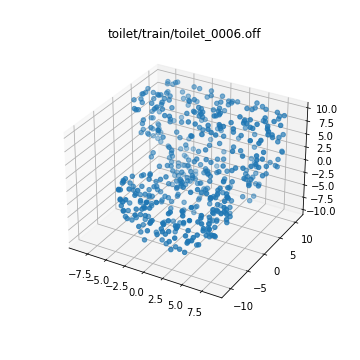

In [ ]:
# Step3_3 從3D圖中隨機採樣取座標點
# Step3_3 Randomly sample coordinate points from the 3D image

File = src_files[4]
File = File[:-5]+'6.off'
mesh = trimesh.load(os.path.join(DATA_DIR, File))
# mesh.show()

%matplotlib widget
points = mesh.sample(500)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
#ax.set_axis_off()
plt.gca().set(
    title=File,
)
plt.show()

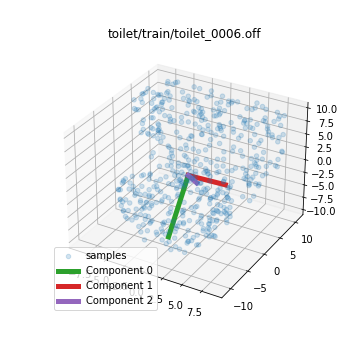

In [ ]:
# Step4 使用 PCA 繪製主成分
# Step4 Use PCA to draw principal components
%matplotlib widget
# n_components: Number of components to keep. 
pca = PCA(n_components=3).fit(points)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], alpha=0.2, label="samples")
#plt.scatter(points[:, 0], points[:, 1], points[:, 2], alpha=0.2, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    ax.plot(
        [0, comp[0]/((np.max(points[:,0])-np.min(points[:,0]))/4)],
        [0, comp[1]/((np.max(points[:,1])-np.min(points[:,1]))/4)],
        [0, comp[2]/((np.max(points[:,2])-np.min(points[:,2]))/4)],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    title=File,
)
plt.legend()
plt.show()